<a href="https://colab.research.google.com/github/tackulus/204383/blob/main/Code11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **11 Watermarking**

> **204383 Image Processing** 

---

> **Tocktack | Kasidis Torcharoen (610510531)** \\
**Top | Kittisak Thammawong (610510611)**

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from google.colab.patches import cv2_imshow

In [51]:
# Read an image
img = cv.imread('1001.jpg')
watermark = cv.imread("Watermark.png")
img.shape, watermark.shape

((450, 640, 3), (100, 400, 3))

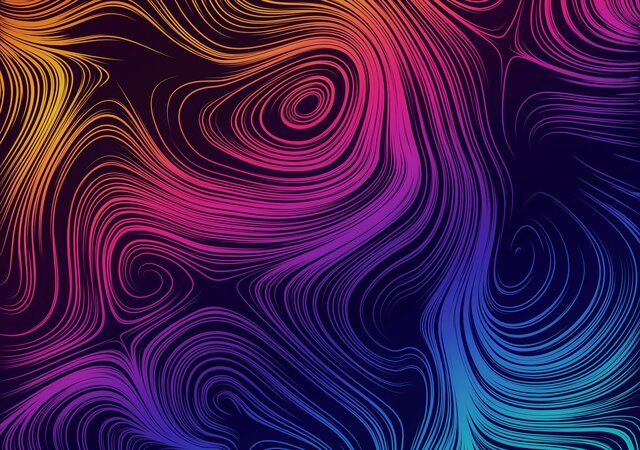

In [ ]:
cv2_imshow(img)

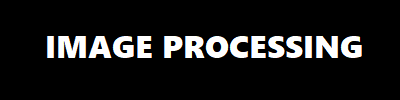

In [ ]:
cv2_imshow(watermark)

# Visible Watermarking

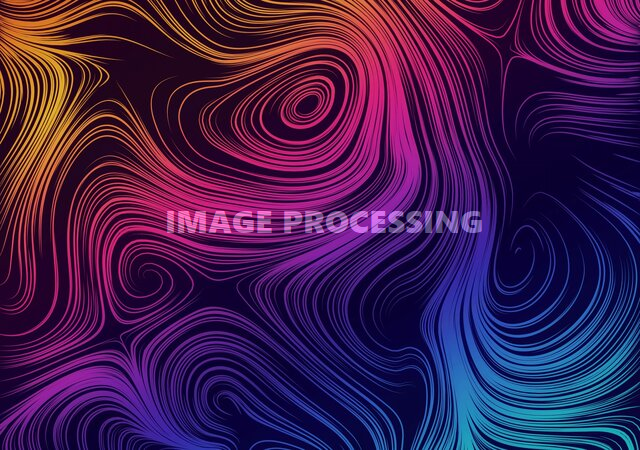

In [23]:
def visible_wm(src, WM, scale=0.3):
    h, w, = src.shape[:2]
    cy, cx = h_img // 2, w_img // 2
    hWM, wWM, = WM.shape[:2]
    cyWM, cxWM = hWM // 2, wWM // 2
    top_y = cy - cyWM
    left_x = cx - cxWM
    bottom_y = top_y + hWM
    right_x = left_x + wWM

    roi = src[top_y:bottom_y, left_x:right_x]
    result = cv.addWeighted(roi, 1, WM, scale, 0)

    dst = np.array(src)
    dst[top_y:bottom_y, left_x:right_x] = result

    return dst

result1 = visible_wm(img, watermark)
cv2_imshow(result1)

# Invisible Watermark

<img src="https://invisiblewatermark.net/static/how-invisible-pixels-work.jpg">

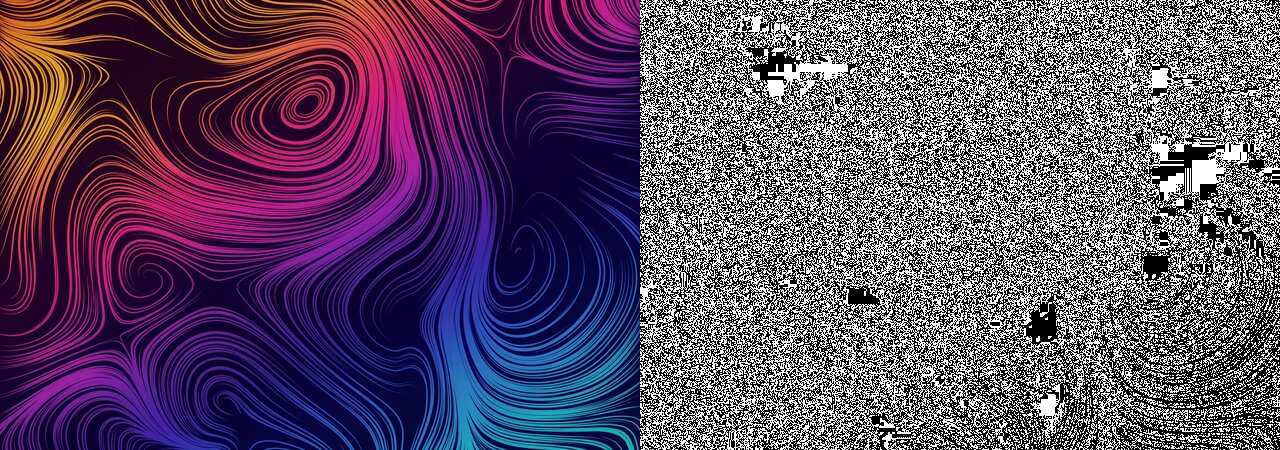

In [106]:
def parity_decoder(src, scale=255): 
    dst = np.zeros_like(src)
    for i in range(3):
        dst[...,i] = src[..., 2] % 2 * scale

    return dst.astype('uint8')

decoded_img = parity_decoder(img)
frame = cv.hconcat((img, decoded_img))
cv2_imshow(frame)

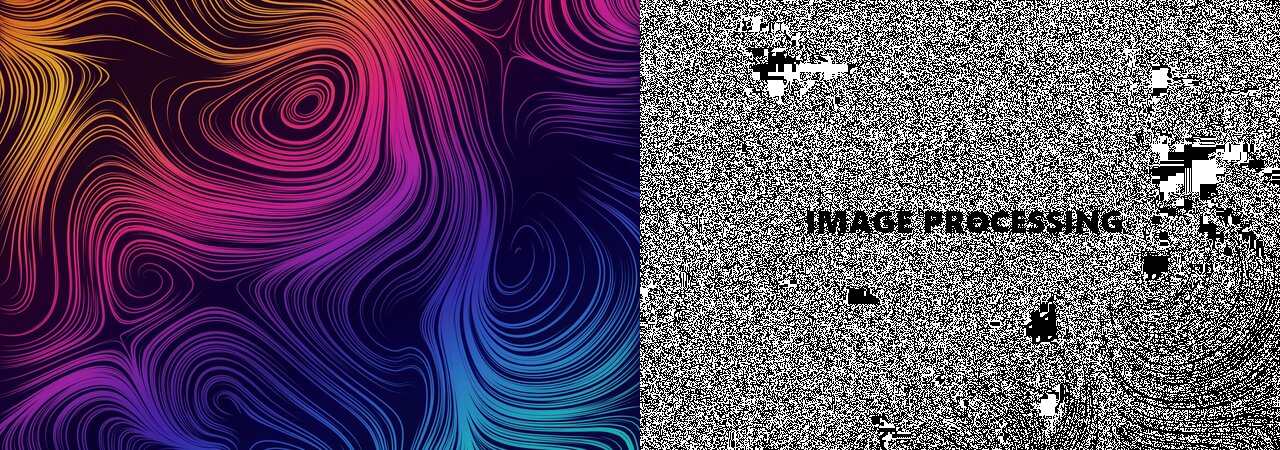

In [146]:
def invisible_wm(src, WM):

    def to_binary(n):
        if n > 200: return 1
        else: return 0

    mask = np.zeros_like(src)
    mask = visible_wm(mask, WM, scale=1)
    binary_wm = np.vectorize(to_binary)(mask).astype('uint8')

    decoded_src = parity_decoder(src, scale=1)
    decoded_src[~binary_wm[...,2].astype(bool)] = 0

    dst = np.copy(img)
    dst[..., 2] -= decoded_src[..., 2]

    return dst

result2 = invisible_wm(img, watermark)
decoded_result2 = parity_decoder(result2)
frame = cv.hconcat((img, decoded_result2))
cv2_imshow(frame)